In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import datetime
import time
import collections
import pandas
import pylab as pl
from pandas.plotting import scatter_matrix
from pylab import *
from tqdm.auto import tqdm

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances_argmin
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

plt.rcParams["figure.figsize"] = [9, 5]
sns.set(rc={'figure.figsize': (6, 3)})

tqdm.pandas()


In [2]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [3]:
%matplotlib inline

In [9]:
df_1 = pd.read_csv('yelp_business.csv')
df.shape

(174567, 13)

In [10]:
df_1.head(5)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [13]:
df_2 = pd.read_csv('yelp_business_hours.csv')

In [14]:
df_2.head(5)

,business_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,FYWN1wneV18bWNgQjJ2GNg,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,None,None
1,He-G7vWjzVUysIKrfNbPUQ,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-16:0,8:0-16:0,None
2,KQPW8lFf1y5BT2MxiSZ3QA,None,None,None,None,None,None,None
3,8DShNS-LuFqpEWIp0HxijA,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,11:0-19:0
4,PfOCPjBrlQAnz__NXj9h_w,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-2:0,11:0-0:0


In [28]:
df_3 = pd.read_csv('yelp_checkin.csv')
df_3.shape

(146350, 4)

In [17]:
df_3.head(5)

,business_id,weekday,hour,checkins
0,7KPBkxAOEtb3QeIL9PEErg,Sat,1:00,3
1,kREVIrSBbtqBhIYkTccQUg,Sat,16:00,1
2,tJRDll5yqpZwehenzE2cSg,Thu,0:00,1
3,r1p7RAMzCV_6NPF0dNoR3g,Sat,23:00,1
4,mDdqgfrvROGAumcQdZ3HIg,Thu,22:00,1


In [19]:
df_4 = pd.read_csv('yelp_tip.csv')

In [20]:
df_4.head(5)

,text,date,likes,business_id,user_id
0,Great breakfast large portions and friendly wa...,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg
1,Nice place. Great staff. A fixture in the tow...,2014-06-20,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw
2,Happy hour 5-7 Monday - Friday,2016-10-12,0,dAa0hB2yrnHzVmsCkN4YvQ,ulQ8Nyj7jCUR8M83SUMoRQ
3,"Parking is a premium, keep circling, you will ...",2017-01-28,0,ESzO3Av0b1_TzKOiqzbQYQ,ulQ8Nyj7jCUR8M83SUMoRQ
4,Homemade pasta is the best in the area,2017-02-25,0,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ


In [26]:
df_1['name'] = df_1['name'].str.replace('','').astype(str)

In [29]:
df_1.nunique()

business_id     174567
name            132619
neighborhood       408
address         138564
city              1093
state               67
postal_code      16004
latitude        138432
longitude       138844
stars                9
review_count      1061
is_open              2
categories       76419
dtype: int64

In [30]:
df_1.dtypes

business_id      object
name             object
neighborhood     object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
categories       object
dtype: object

In [31]:
le_dict = {}
for col in df_1.dtypes[df_1.dtypes=="object"].index:
    print(col)
    le_dict[col] = preprocessing.LabelEncoder()
    df_1[col] = le_dict[col].fit_transform(df_1[col].astype(str))

business_id
name
neighborhood
address
city
state
postal_code
categories


In [32]:
df_1.columns

Index(['business_id', 'name', 'neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'categories'],
      dtype='object')

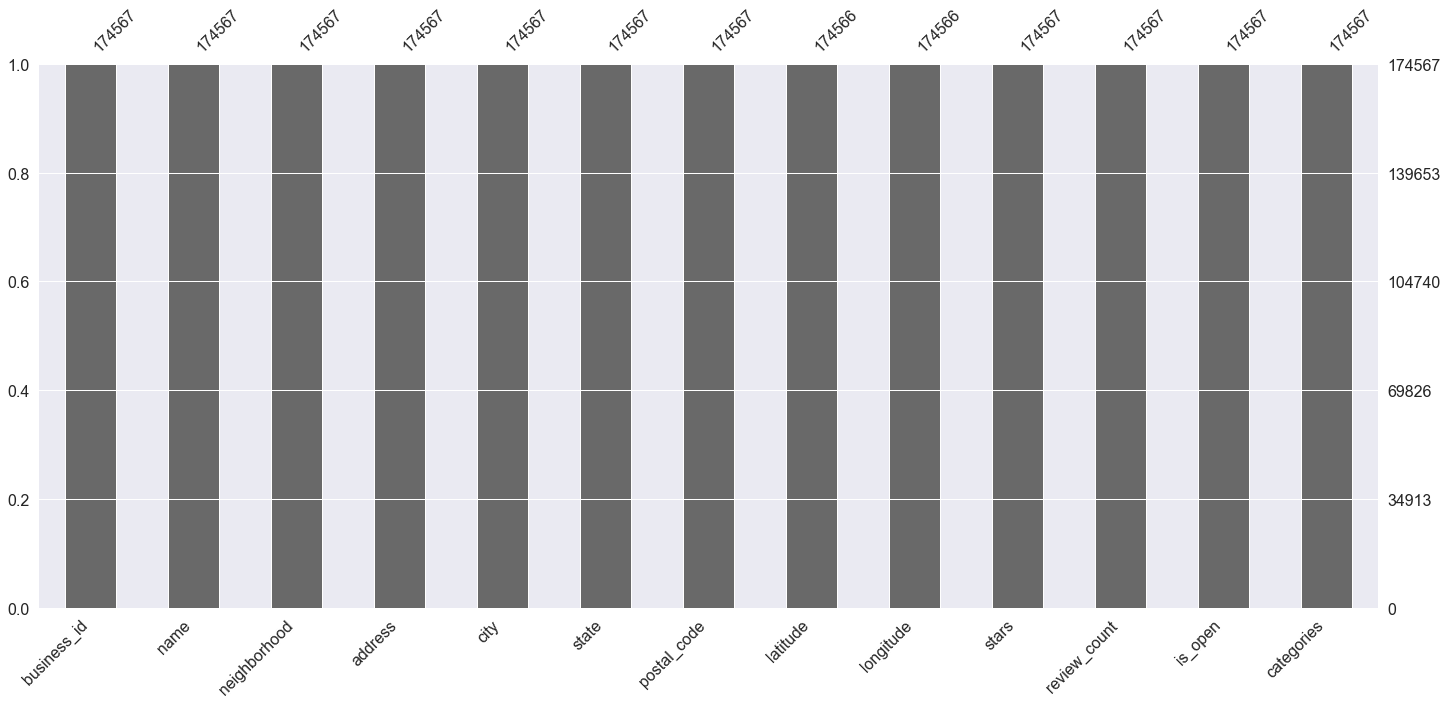

In [33]:
msno.bar(df_1)

In [34]:
df_1['latitude'] = df_1['latitude'].progress_apply(lambda x: round(x,2))
df_1['longitude'] = df_1['longitude'].progress_apply(lambda x: round(x,2))

In [35]:
df_1['neighborhood'].fillna('' ,inplace = True)

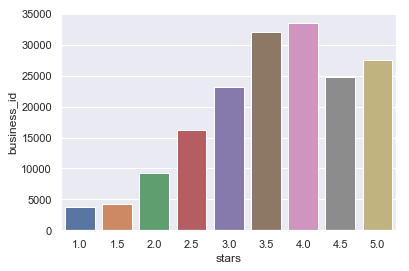

In [36]:
df_temp = df.groupby('stars')[['business_id']].count().reset_index()
sns.barplot(x='stars', y='business_id', data=df_temp)

In [55]:
df_final = pd.merge(
    df_1[['business_id', 'name', 'neighborhood', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'categories']],
    df_3,
    how='left',
    on=['business_id'])

In [56]:
le_dict = {}
for col in df_3.dtypes[df_3.dtypes=="object"].index:
    print(col)
    le_dict[col] = preprocessing.LabelEncoder()
    df_3[col] = le_dict[col].fit_transform(df_3[col].astype(str))

In [57]:
df_final.head(5)

,business_id,name,neighborhood,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,weekday,hour,checkins
0,45282,33426,408,5,9,652,33.33,-111.98,4.0,22,1,19725,2.0,11.0,1.0
1,51074,108565,408,518,48,138,40.29,-80.10,3.0,11,1,33993,3.0,0.0,1.0
2,58662,128481,408,713,9,627,33.52,-112.12,1.5,18,1,20085,1.0,13.0,1.0
3,25120,107336,408,969,9,748,33.38,-111.96,3.0,9,0,70306,4.0,14.0,1.0
4,72956,18354,408,192,46,386,41.12,-81.48,3.5,116,1,2017,2.0,16.0,3.0


In [58]:
df_3.nunique()

business_id    146350
weekday             7
hour               24
checkins          112
dtype: int64

In [59]:
df_final.dtypes

business_id       int64
name              int64
neighborhood      int64
city              int64
state             int64
postal_code       int64
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
categories        int64
weekday         float64
hour            float64
checkins        float64
dtype: object

In [60]:
df_final.nunique()

business_id     174567
name            132619
neighborhood       409
city              1094
state               68
postal_code      16005
latitude           818
longitude         1094
stars                9
review_count      1061
is_open              2
categories       76419
weekday              7
hour                24
checkins           112
dtype: int64

In [65]:
def random_forest_regressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                        test_size=0.3, 
                                                        random_state=21)
    rf = RandomForestRegressor(n_estimators=500,
                               min_samples_leaf=0.1,
                               random_state=21,
                              n_jobs=-1)
    rf.fit(X_train, y_train)
    return rf

In [66]:
df_final.dropna(inplace=True)

In [70]:
feature_col = ['business_id', 'name', 'neighborhood', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'review_count', 'is_open',
       'categories', 'weekday']
feature_col1 = ['business_id', 'name', 'neighborhood', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'is_open',
       'categories', 'weekday']
X = df_final[feature_col].values
y = df_final['stars'].values
X_1 = df_final[feature_col1].values
y1 = df_final['review_count'].values
rf = random_forest_regressor(X,y)
rf1 = random_forest_regressor(X_1, y1)

In [68]:
X.shape

(146349, 12)

In [69]:
y.shape

(146349,)

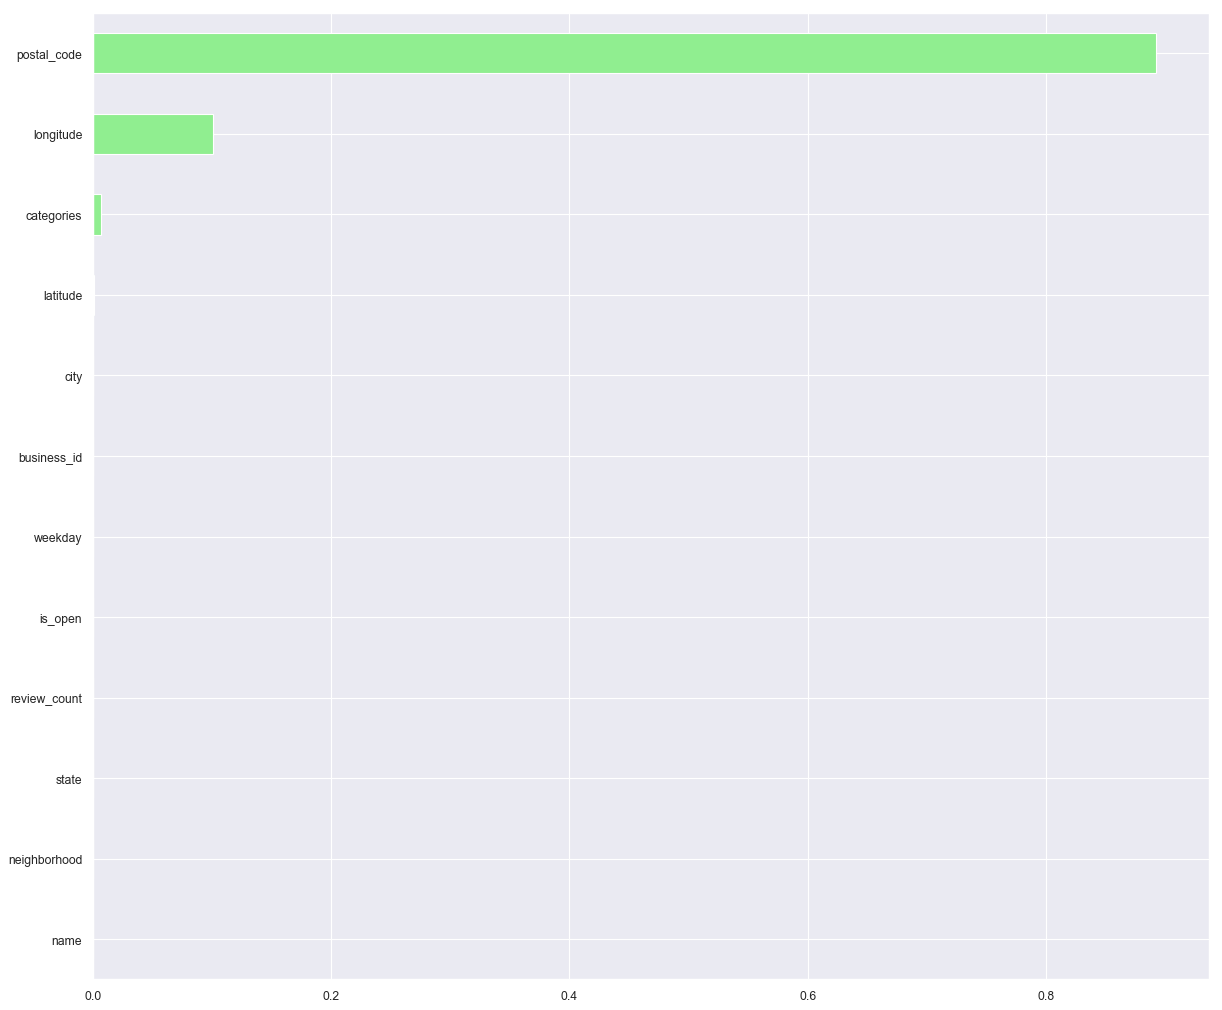

In [67]:
importances_rf = pd.Series(rf.feature_importances_, index = feature_col)
sorted_importances_rf = importances_rf.sort_values()
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
sorted_importances_rf.plot(kind='barh', color='lightgreen')
plt.show()

In [72]:
validation_size = 0.20
seed = 321
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)
scoring = 'accuracy'